### Project Overview:
- For this project you will need to fetch ever company in the Russell 2000 for 2020 and get the Adj Close for each company
- We would like to see the Dips and Gains for the Daily Returns of every stock under 10 dollars in ascending order.
- Repeat the same process for every company in the index
- If we were to have every company in the Russell 2000 in a portfolio which 20 companies would make up the top end of the index for 2020
- We want you to than go back 5 years and see how these companies performed pre- Covid. What is the max return we would have received during this 5 year period considering volatility.

### Project Approach
- Fetch all companies in Russell 2000
- Use pandas Datareader to get the Adj Close
- Calculate the Daily returns for each security
- Find the top 20 Gains and Dips for returns 
- Put every security into a portfolio and optimize the portfolio with 5 years of data (2015-2019end)
- Find the top companies the make up the index by weight and put them into a portfolio 
- Run a portfolio optimization on the portfolio using Markowitz Efficient Frontier. 

### libraries


In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_datareader import data as web

In [58]:
russ = pd.read_excel("resources/Russle_2000_2020.xlsx", index_col='Ticker')

### Data Overview 
- For 2020 we have 1999 conpanies in the Russle 2000

In [59]:
russ

,Name
Ticker,
AAN,"Aaron's, Inc."
AAOI,"Applied Optoelectronics, Inc."
AAON,"AAON, Inc."
AAT,"American Assets Trust, Inc."
AAWW,"Atlas Air Worldwide Holdings, Inc."
...,...
ZIXI,Zix Corp.
ZUMZ,"Zumiez, Inc."
ZUO,"Zuora, Inc."


In [60]:
russ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, AAN to ZYXI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


### Adj Closes
- Will import data already fetched previously
- Will download the Adj Close for each security for 2020 beginning 2020-1-1 to current using pandas Datareader

In [61]:
tickers = list(russ.index)

In [62]:
tickers

['AAN',
 'AAOI',
 'AAON',
 'AAT',
 'AAWW',
 'AAXN',
 'ABCB',
 'ABEO',
 'ABG',
 'ABM',
 'ABTX',
 'AC',
 'ACA',
 'ACAD',
 'ACBI',
 'ACCO',
 'ACER',
 'ACHN',
 'ACIA',
 'ACIW',
 'ACLS',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ADC',
 'ADES',
 'ADMA',
 'ADMS',
 'ADNT',
 'ADRO',
 'ADSW',
 'ADTN',
 'ADUS',
 'ADVM',
 'AEGN',
 'AEIS',
 'AEL',
 'AEO',
 'AERI',
 'AFI',
 'AFIN',
 'AFMD',
 'AGE',
 'AGEN',
 'AGLE',
 'AGM',
 'AGS',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AI',
 'AIMC',
 'AIMT',
 'AIN',
 'AIR',
 'AIRG',
 'AIT',
 'AJRD',
 'AJX',
 'AKBA',
 'AKCA',
 'AKR',
 'AKRO',
 'AKRX',
 'AKS',
 'AKTS',
 'ALBO',
 'ALCO',
 'ALDR',
 'ALDX',
 'ALE',
 'ALEC',
 'ALEX',
 'ALG',
 'ALGT',
 'ALLK',
 'ALLO',
 'ALOT',
 'ALRM',
 'ALTM',
 'ALTR',
 'ALX',
 'AMAG',
 'AMAL',
 'AMBA',
 'AMBC',
 'AMC',
 'AMED',
 'AMEH',
 'AMK',
 'AMKR',
 'AMN',
 'AMNB',
 'AMOT',
 'AMPH',
 'AMRC',
 'AMRS',
 'AMRX',
 'AMSC',
 'AMSF',
 'AMSWA',
 'AMTB',
 'AMWD',
 'ANAB',
 'ANDE',
 'ANF',
 'ANGO',
 'ANH',
 'ANIK',
 'ANIP',
 'AOBC

In [63]:
data = pd.DataFrame()

In [64]:
#failed = []
#passed = []
#for x in tickers:
   # try:
      #  data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
       # passed.append(x)
    #except (IOError, KeyError):
     #   msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        #failed.append(x)

### PEnny Stocks

In [65]:
stocks_under_10 = pd.read_csv("resources/penny_stocks_under10.csv", index_col="Date")

In [66]:
penny_tickers = list(stocks_under_10.columns)

In [67]:
penn_Data = pd.DataFrame()

In [68]:
penny_failed = []
penny_passed = []
for x in penny_tickers:
    try:
        penn_Data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-6-1")["Adj Close"]
        penny_passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        penny_failed.append(x)

KeyboardInterrupt: 

In [ ]:
penn_Data

In [10]:
data

,AAN,AAOI,AAON,AAXN,ABCB,ABEO,ABG,ABM,ABTX,AC,...,YORW,YRCW,ZAGG,ZEUS,ZGNX,ZIOP,ZUMZ,ZUO,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,57.493904,12.50,49.715336,76.559998,42.455322,3.21,111.330002,38.128220,37.230312,39.378227,...,44.718735,2.58,NaN,NaN,52.340000,4.62,NaN,14.76,5.88,7.920000
2020-01-03,56.796043,12.12,50.173725,73.930000,42.286449,2.90,108.389999,38.028980,37.150829,39.388199,...,44.778507,2.57,NaN,NaN,51.080002,4.50,NaN,14.77,5.81,8.350000
2020-01-06,57.503872,12.15,50.084038,68.750000,42.157314,2.77,107.739998,38.019058,37.170700,39.677376,...,44.639042,2.56,NaN,NaN,51.200001,4.49,NaN,14.67,5.70,8.420000
2020-01-07,57.414150,12.43,49.974426,69.769997,41.869251,2.57,103.790001,37.701488,36.813004,39.049160,...,44.439804,2.55,NaN,NaN,51.830002,4.53,NaN,14.69,5.56,8.540000
2020-01-08,58.421062,12.70,49.834915,69.610001,42.365921,2.62,103.129997,38.108376,37.309799,39.677376,...,43.991520,2.41,NaN,NaN,52.020000,4.59,NaN,14.66,5.31,8.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-22,43.560001,9.94,54.049999,92.500000,24.309999,2.98,75.879997,38.990002,25.110001,34.990002,...,45.930000,1.67,NaN,NaN,28.510000,3.55,NaN,13.51,6.33,24.440001
2020-06-23,44.380001,9.80,54.209999,95.540001,23.680000,3.06,76.610001,38.009998,25.010000,34.209999,...,46.910000,1.65,NaN,NaN,28.450001,3.58,NaN,13.34,6.22,24.340000
2020-06-24,42.770000,9.34,52.770000,93.430000,22.730000,2.88,73.040001,35.570000,23.950001,34.560001,...,46.290001,1.56,NaN,NaN,28.370001,3.43,NaN,12.79,6.26,23.590000


### Getting todays Date as a variable 

In [11]:
todays_date = data[-1:].iloc[0].name

In [12]:
todays_date

Timestamp('2020-06-26 00:00:00')

### Failed and Passed
- 54 companies failed and 1945 passed

In [13]:
passed = pd.DataFrame(passed, columns=["Tickers"])

In [14]:
passed.to_csv("resources/passed_tickers.csv")

In [15]:
len(failed)

295

In [16]:
len(passed)

1704

### Getting Penny Stocks 
- For penny stocks we will get all companies in the Russell 2000 we will take all stocks under 10 bucks to consideration as of the begining of 2020

In [17]:
penny_Stocks = data[data.apply(lambda x: x < 10)].dropna(axis = 1)

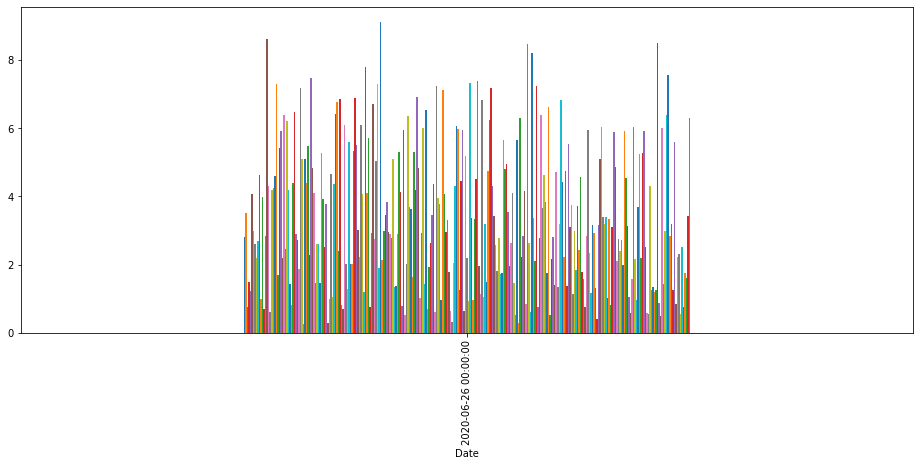

In [18]:
penny_Stocks[-1:].plot(kind = "bar", figsize = (16,6), legend = None)

## Daily Returns for PennyStocks
- We will look at the penny stocks Dips and spikes
- Will check for today's Date

In [19]:
penny_returns = penny_Stocks.pct_change()

In [20]:
top_20_penny_spikes = penny_returns[-1:].transpose().sort_values(todays_date, ascending = False).head(20)

In [21]:
top_20_penny_spikes["Adj Close"] = data[list(top_20_penny_spikes.index)][-1:].transpose().values

In [22]:
top_20_penny_spikes.columns = ["return", "Adj Close"]

In [23]:
top_20_penny_spikes

,return,Adj Close
BBCP,0.501370,5.480
PRGX,0.234637,4.420
RLH,0.220000,2.440
FLMN,0.219431,3.640
TTI,0.195652,0.550
PZN,0.186695,5.530
LCUT,0.150943,7.320
BGG,0.149606,1.460
GLYC,0.149502,3.460
CHRA,0.147727,2.020


## Penny Dips 
- Will loook at top 20 penny shares that took the biggest dips

In [24]:
top_20_penny_dips = penny_returns[-1:].transpose().sort_values(todays_date, ascending = True).head(20)

In [25]:
top_20_penny_dips["Adj Close"] = data[list(top_20_penny_dips.index)][-1:].transpose().values

In [26]:
top_20_penny_dips.columns = ["returns", " Adj Close"]

In [27]:
top_20_penny_dips.to_csv("resources/top_20_penny_dips.csv")

In [28]:
top_20_penny_dips

,returns,Adj Close
ETM,-0.167702,1.34
NL,-0.133739,2.85
ODP,-0.117647,2.10
SIEB,-0.114983,5.08
FNCB,-0.110924,5.29
MR,-0.106329,3.53
RUBY,-0.105581,5.93
NEXT,-0.104839,2.22
TH,-0.102857,1.57
FLNT,-0.098901,1.64


### Entire Index DIPS
- We will look at the dips for the entire market

In [29]:
index_returns = data.pct_change()

In [30]:
russ_top_30_dips = index_returns[-1:].transpose().sort_values(todays_date).head(30)

In [31]:
russ_top_30_dips["Adj Close"] = data[list(russ_top_30_dips.index)][-1:].transpose()[todays_date].values

In [32]:
russ_top_30_dips.columns = ["returns", "Adj Close"]

In [33]:
russ_top_30_dips

,returns,Adj Close
SOLY,-0.362025,7.560000
TBIO,-0.210377,19.480000
GWGH,-0.174074,6.690000
ETM,-0.167702,1.340000
PDCE,-0.147103,11.480000
STRO,-0.136038,7.240000
NL,-0.133739,2.850000
CIX,-0.124824,12.410000
MINI,-0.122977,32.520000
WSC,-0.120858,13.530000


### Russ Spikes

In [34]:
russ_top_30_spikes = index_returns[-1:].transpose().sort_values(todays_date, ascending = False).head(30)

In [35]:
russ_top_30_spikes["ADj Close"] = data[list(russ_top_30_spikes.index)][-1:].transpose()

In [36]:
russ_top_30_spikes.columns = ["returns", "Adj Close"]

In [37]:
 russ_top_30_spikes

,returns,Adj Close
BBCP,0.501370,5.480000
BIG,0.271492,43.040001
PRGX,0.234637,4.420000
RLH,0.220000,2.440000
FLMN,0.219431,3.640000
TTI,0.195652,0.550000
SGC,0.192791,14.230000
ARL,0.189873,9.400000
PZN,0.186695,5.530000
BSIG,0.179742,11.880000


### Russell 2000 as a portfolio - 2020
 - We want to know which 20 companies in the russell 2000 would have generated the highest returns for 2020 so far. 
 - there are a little over 1900 companies listed  in the russell 2000 
 - We will create 2000 portfolios that will contain these companies and reandomly weigh each
 - based of the daily returns of each company we can generate the expected returns as well as a sharp ratio for each portfolio in the 2000
 - USing this we will find the portfilio with the highest return, best sharp, and lowest vol

In [38]:
daily_returns = data.pct_change()

In [39]:
n_portfolios = 1000
all_weights = np.zeros((n_portfolios, len(passed)))
all_returns = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_sharp = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(passed)))
    weights = weights/weights.sum()
    
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(daily_returns.mean() * weights) * 252 
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    all_sharp[ind] = all_returns[ind]/all_vol[ind]

### Max Sharp

In [40]:
all_vol

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [41]:
len(daily_returns.columns)

1704

In [42]:
all_weights

array([[9.80586326e-04, 7.90639391e-05, 4.97516671e-04, ...,
        7.58208430e-04, 2.65676491e-04, 5.95158696e-04],
       [3.33474259e-04, 1.10189537e-03, 4.60409172e-04, ...,
        9.11737956e-04, 6.34340646e-04, 8.25313873e-04],
       [8.10830313e-04, 7.53907017e-04, 1.04698130e-03, ...,
        1.54760708e-04, 6.47950578e-05, 1.44188540e-04],
       ...,
       [7.39151322e-04, 1.14732582e-03, 1.36203861e-05, ...,
        5.59525617e-04, 7.42426602e-04, 1.43272731e-04],
       [1.16346044e-03, 1.86741030e-04, 9.75981801e-04, ...,
        6.35105641e-04, 6.71250233e-04, 1.01969605e-03],
       [3.27469570e-04, 9.24063376e-04, 7.17104818e-04, ...,
        3.09062452e-04, 8.20756274e-04, 1.01874674e-03]])

In [43]:
len(passed)

1704

In [44]:
max_sharp = all_sharp.argmax()

In [45]:
max_sharp

0

In [46]:
max_return = all_returns.argmax()

In [47]:
max_return

149

In [48]:
lowest_vol = all_vol.argmin()

In [49]:
lowest_vol

0

## 2020 Russell Optimization Overview
- With covid the best portfolio composed in the index would have only provided a 8% return year to date. 
- Will take a look at the companies that would have provided this return below

<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


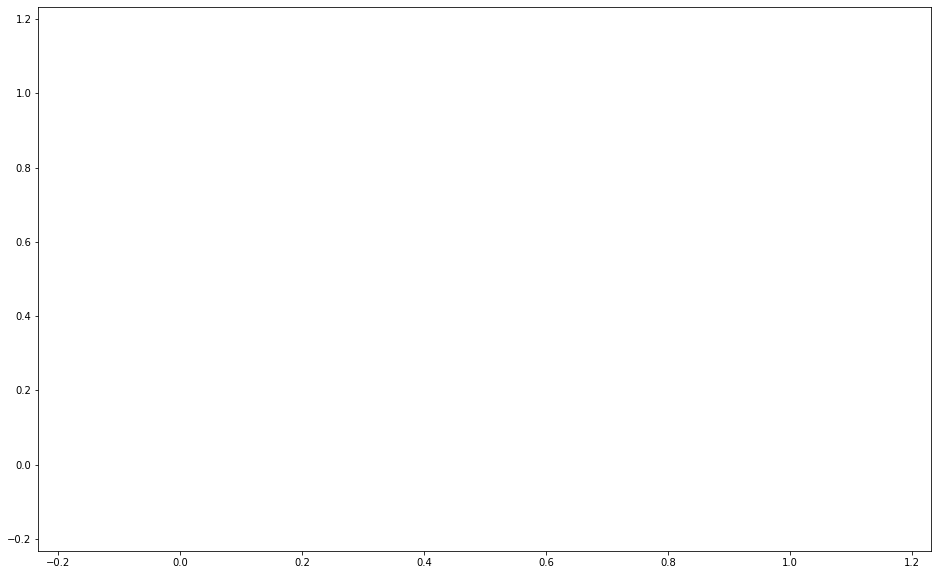

In [50]:
plt.figure(figsize=(16,10))
plt.scatter(all_vol, all_returns, c = all_sharp, alpha=0.4)
plt.scatter(all_vol[max_return], all_sharp[max_return], c= "b", s = 160)
plt.scatter(all_vol[max_sharp], all_sharp[max_sharp], c= "r", s = 60)
plt.scatter(all_vol[lowest_vol], all_sharp[lowest_vol], c= "r", s = 60)

#### Russ Max return analysis
- For 2020 it appears the best portfolio consisting of all 2000 companies would not have given you much of. a return as all.But this is an unrealistic portfolio. What we c antke from this is which 20 companies would have allocatedthe most weight in the portfolio for 2020. 
- We can then run a 5 year analysis on those companies to see what return we may have gotten pre-covid 

In [51]:
russell_2020_optimize = pd.DataFrame(all_returns, columns=["returns"])

In [52]:
russell_2020_optimize["sharp"] = all_sharp

In [53]:
russell_2020_optimize["vol"] = all_vol

In [54]:
weights_opti = pd.DataFrame(all_weights, columns= data.columns)

In [55]:
###weights_opti.to_csv("resources/russ_2020_optimized_weights.csv")

In [56]:
russell_2020_optimize = pd.concat([russell_2020_optimize, weights_opti], axis=1)

In [57]:
## russell_2020_optimize.to_csv("resources/rus2020_optimized_port.csv")

In [58]:
all_returns.min()

-0.0919537284231916

In [59]:
top_20_russ = russell_2020_optimize[russell_2020_optimize["returns"] == russell_2020_optimize["returns"].max() ].transpose().drop(["returns"
                                                                    , "vol", "sharp"]).sort_values(971, ascending = False).head(20)

KeyError: 971

In [ ]:
top_20_20202_russ_tickers = list(top_20_russ.index)

### Top 20 over 5 years

In [ ]:
top_20_weighted_companies = pd.DataFrame()

In [ ]:
for t in top_20_20202_russ_tickers:
    top_20_weighted_companies[t] = web.DataReader(t, data_source="yahoo", start = "2015-1-1", end = "2019-12-31")["Adj Close"]

In [ ]:
top_20_weighted_companies.plot(figsize = (16,9))
plt.savefig("resources/top_20_optimized.png")

#### Top 20 optimization 
- lets see what returns we could hvve received for a portfolio consisting of these 20 companies over a 5 year span 

In [ ]:
top_20_returns = top_20_weighted_companies.pct_change()

In [ ]:
n_portfolios = 2500
all_weights = np.zeros((n_portfolios, len(top_20_20202_russ_tickers)))
all_returns = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_sharp = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(top_20_20202_russ_tickers)))
    weights = weights/weights.sum()
    
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(top_20_returns.mean() * weights) * 252 
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(top_20_returns.cov() * 252, weights)))
    all_sharp[ind] = all_returns[ind]/all_vol[ind]

In [ ]:
max_returns = all_returns.argmax()

In [ ]:
max_sharp = all_sharp.argmax()

In [ ]:
lowest_vol = all_vol.argmin()

### Summary
- The 20 companies would have provided a possible 25% ROI over a 5 year span(pre COVID) - with max voatility
- Approximately 16% with lo vol and 17% with the max sharp
- Tis is not a bad portfolio 

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(all_vol, all_returns, c = all_sharp, alpha=0.4)
plt.scatter(all_vol[max_returns], all_vol[max_returns], c= "b", s = 160, label = "Max Return")
plt.scatter(all_vol[max_sharp], all_vol[max_sharp], c= "r", s = 90, label = "Max Sharp")
plt.scatter(all_vol[lowest_vol], all_vol[lowest_vol], c= "black", s = 90, label = "lowest vol")
plt.xlabel("Vol")
plt.ylabel("Return")
plt.title("Top 20 optimized portfolios(2500 portfoios)")
plt.legend()

In [ ]:
top_20_weighted_companies[-1:].plot(kind = "bar", figsize = (16,6))
plt.title("top 20 companies\n end of 2019")
plt.savefig("resources/top_20_portfolio_end0f_19.png")